# DigiNext Bootcamp Project

## Step 0: Data Exploration

### import neccessary libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib as matplot
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import TargetEncoder

### import datasets & Initial Data Exploration

#### Product dataset exploration

In [4]:
df_products = pd.read_csv('BaSalam.products.csv')

/var/folders/rp/jsdh10cj68lf8yq9pr76clp80000gn/T/ipykernel_1708/1451024866.py:1: DtypeWarning: Columns (18,35,36,37,38,42) have mixed types. Specify dtype option on import or set low_memory=False.
  df_products = pd.read_csv('BaSalam.products.csv')


In [24]:
print(df_products.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411358 entries, 0 to 2411357
Data columns (total 43 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   _id                            int64  
 1   _score                         float64
 2   sales_count_week               int64  
 3   name                           object 
 4   price                          float64
 5   status_id                      float64
 6   status_title                   object 
 7   stock                          float64
 8   photo_MEDIUM                   object 
 9   photo_SMALL                    object 
 10  rating_average                 float64
 11  rating_count                   float64
 12  rating_signals                 float64
 13  primaryPrice                   float64
 14  preparationDays                float64
 15  weight                         float64
 16  categoryId                     float64
 17  has_delivery                   object 
 18  ha

In [1]:
df_products.head()

NameError: name 'df_products' is not defined

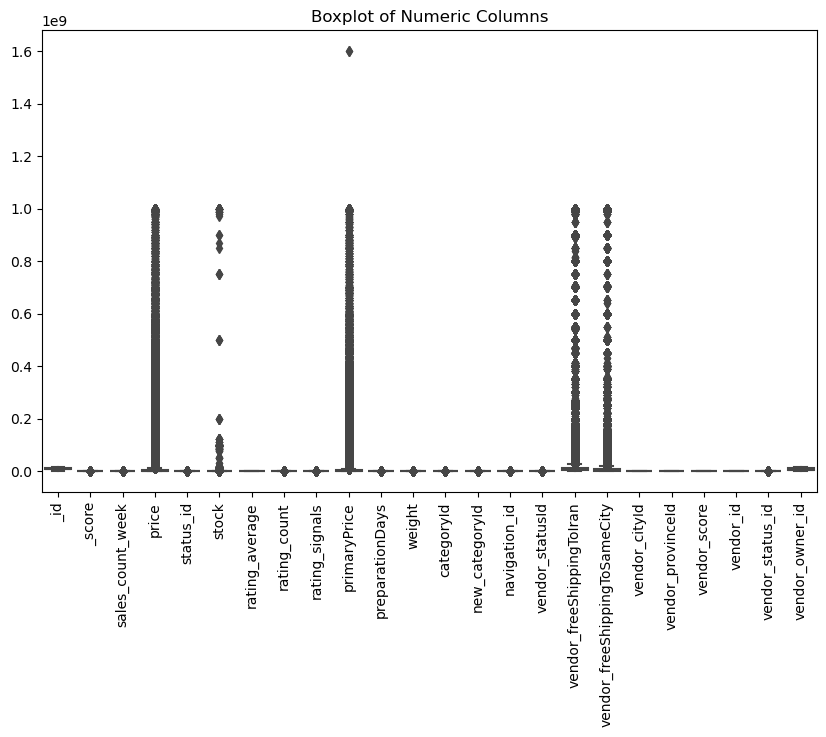

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_products.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns")
plt.show()

#### Reviews dataset exploration

In [27]:
df_reviews = pd.read_csv('BaSalam.reviews.csv')

/var/folders/rp/jsdh10cj68lf8yq9pr76clp80000gn/T/ipykernel_2113/2059296138.py:1: DtypeWarning: Columns (30) have mixed types. Specify dtype option on import or set low_memory=False.
  df_reviews = pd.read_csv('BaSalam.reviews.csv')


In [28]:
print(df_reviews.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3393574 entries, 0 to 3393573
Data columns (total 31 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   _id                      object 
 1   productId                int64  
 2   star                     int64  
 3   user_id                  int64  
 4   isPost                   bool   
 5   isPublic                 bool   
 6   id                       int64  
 7   createdAt                object 
 8   updatedAt                object 
 9   hashId                   object 
 10  isPosted                 object 
 11  isLikedByCurrentUser     bool   
 12  isDislikedByCurrentUser  bool   
 13  likeCount                int64  
 14  dislikeCount             int64  
 15  attachments              object 
 16  history_count            int64  
 17  user_id_of_user          int64  
 18  name_of_user             object 
 19  hash_id_of_user          object 
 20  photo_of_user            object 
 21  descript

In [29]:
df_reviews.head()

,_id,productId,star,user_id,isPost,isPublic,id,createdAt,updatedAt,hashId,...,description,reason_ids[0],reason_ids[1],reason_ids[2],reason_ids[3],reason_ids[4],reason_ids[5],reason_ids[6],reason_ids[7],variation_metadata
0,661ba7096a6e1c5d7e653541,824662,5,15127771,False,True,11220580,2024-04-03T23:45:57,2024-04-03T23:45:57,rBNa53,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,661ba7096a6e1c5d7e653542,824662,5,2695119,False,True,11219739,2024-04-03T22:49:50,2024-04-03T22:49:50,joZjyb,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,661ba7096a6e1c5d7e653543,824662,5,11408497,False,True,11219258,2024-04-03T22:19:06,2024-04-03T22:19:06,GxNEX2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,661ba7096a6e1c5d7e653544,824662,5,482919,False,True,11216410,2024-04-03T19:49:25,2024-04-03T19:49:25,dN8rzl,...,عالییییه،دو بار سفارش زدم تا حالا,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,661ba7096a6e1c5d7e653545,824662,5,4427128,False,True,11211517,2024-04-03T15:50:37,2024-04-03T15:50:37,KW3nQa,...,سپاس،تازه و خوشمزه و با کیفیت هست,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


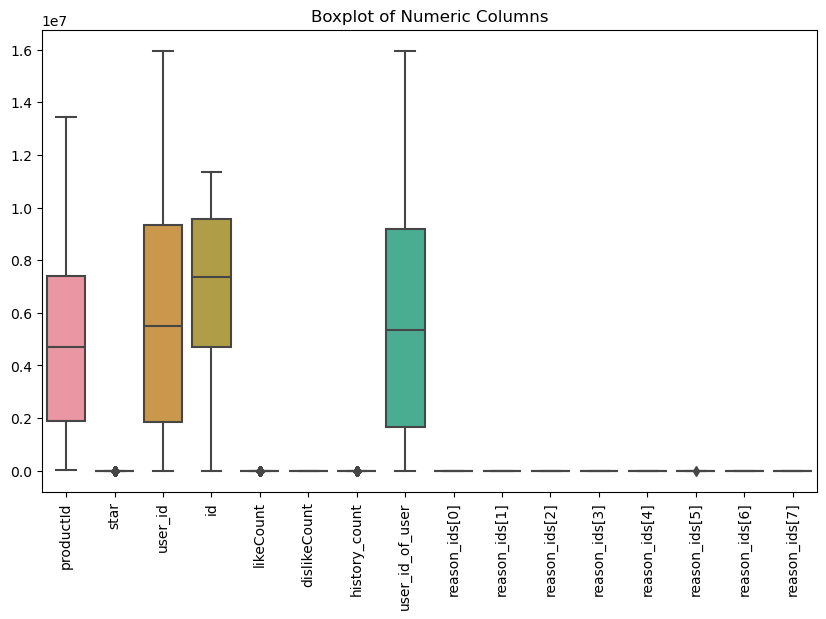

In [30]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_reviews.select_dtypes(include=['int64', 'float64']))
plt.xticks(rotation=90)
plt.title("Boxplot of Numeric Columns")
plt.show()

### DataCleaning

#### Product Dataset

In [31]:
print(df_products.info())
print(df_products.describe())
print(df_products.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2411358 entries, 0 to 2411357
Data columns (total 43 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   _id                            int64  
 1   _score                         float64
 2   sales_count_week               int64  
 3   name                           object 
 4   price                          float64
 5   status_id                      float64
 6   status_title                   object 
 7   stock                          float64
 8   photo_MEDIUM                   object 
 9   photo_SMALL                    object 
 10  rating_average                 float64
 11  rating_count                   float64
 12  rating_signals                 float64
 13  primaryPrice                   float64
 14  preparationDays                float64
 15  weight                         float64
 16  categoryId                     float64
 17  has_delivery                   object 
 18  ha

In [32]:
for col in ['isFreeShipping', 'IsAvailable', 'IsSaleable']:
    df_products[col].fillna(df_products[col].mode()[0], inplace=True)

In [33]:
df_products.drop(columns=['published'], inplace=True)

In [34]:
df_products.drop(columns=['video_ORIGINAL'], inplace=True)

In [35]:
df_products.drop(columns=['promotions'], inplace=True)

In [36]:
df_products.drop(columns=['mainAttribute'], inplace=True)